In [1]:
import simexpal
import yaml

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)
    
for r in results:
    r['instance'] = r['instance'].rsplit('/',1)[1]
    r['instance'] = r['instance'].split('.',1)[0]
    

for r in sorted(results, key=lambda r: (r['batchsize'])):
    print('batch size {} algorithm {}  instance {} and takes: {} ms'.format(
          r['batchsize'], r['algorithm'], r['instance'], r['time_mssp']))

batch size 1 algorithm batch-bf  instance cit-patent and takes: 56 ms
batch size 1 algorithm batch-bf  instance roadNet-TX and takes: 55 ms
batch size 1 algorithm simd-bf  instance cit-patent and takes: 183 ms
batch size 1 algorithm simd-bf  instance roadNet-TX and takes: 170 ms
batch size 2 algorithm batch-bf  instance cit-patent and takes: 84 ms
batch size 2 algorithm batch-bf  instance roadNet-TX and takes: 67 ms
batch size 2 algorithm simd-bf  instance cit-patent and takes: 185 ms
batch size 2 algorithm simd-bf  instance roadNet-TX and takes: 165 ms
batch size 4 algorithm batch-bf  instance cit-patent and takes: 137 ms
batch size 4 algorithm batch-bf  instance roadNet-TX and takes: 99 ms
batch size 4 algorithm simd-bf  instance cit-patent and takes: 187 ms
batch size 4 algorithm simd-bf  instance roadNet-TX and takes: 165 ms
batch size 8 algorithm batch-bf  instance cit-patent and takes: 328 ms
batch size 8 algorithm batch-bf  instance roadNet-TX and takes: 186 ms
batch size 8 algo

In [2]:
import itertools

num_bs = sorted( map((lambda r: r['batchsize']), results))
num_bs = [k for k, g in itertools.groupby(num_bs)]
print(num_bs)

time_batch_cit = sorted( map(lambda r: (r['time_mssp']),\
                          filter(lambda r: (r['algorithm'] == 'batch-bf' and r['instance'] == 'cit-patent'), results)))
time_simd_cit = sorted( map(lambda r: (r['time_mssp']),\
                          filter(lambda r: (r['algorithm'] == 'simd-bf' and r['instance'] == 'cit-patent'), results)))

time_batch_road = sorted( map(lambda r: (r['time_mssp']),\
                          filter(lambda r: (r['algorithm'] == 'batch-bf' and r['instance'] == 'roadNet-TX'), results)))
time_simd_road = sorted( map(lambda r: (r['time_mssp']),\
                          filter(lambda r: (r['algorithm'] == 'simd-bf' and r['instance'] == 'roadNet-TX'), results)))



#for r in sorted(results, key=lambda r: (r['batchsize'])):
#    num_threads.append(r['num_threads'])
#    result.append(r['result'])
#    time.append(r['time'])
    

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


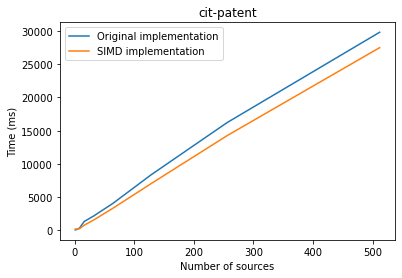

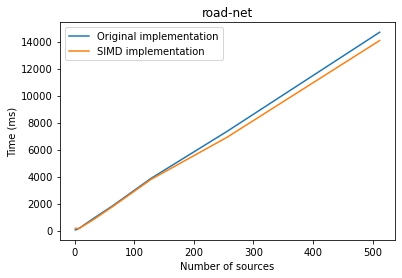

In [4]:
import matplotlib.pyplot as plt
fig, plts = plt.subplots()
plts.plot(num_bs, time_batch_cit, label='Original implementation')
plts.plot(num_bs, time_simd_cit, label='SIMD implementation')
plts.legend()
#plts.set_ylim(ymin=0)
#plts.set_title('Strong scalability')
plts.set_ylabel('Time (ms)')
plts.set_xlabel('Number of sources')
plts.set_title('cit-patent')
#plts.set_xscale('log')
#plts.set_xticks([1, 2, 4, 8, 16, 32, 64])
#plts.set_xticklabels([1, 2, 4, 8, 16, 32, 64])



fig, plts = plt.subplots()
plts.plot(num_bs, time_batch_road, label='Original implementation')
plts.plot(num_bs, time_simd_road, label='SIMD implementation')
plts.legend()
#plts.set_ylim(ymin=0)
#plts.set_title('Strong scalability')
plts.set_ylabel('Time (ms)')
plts.set_xlabel('Number of sources')
plts.set_title('road-net')
#plts.set_xscale('log')
#plts.set_xticks([1, 2, 4, 8, 16, 32, 64])
#plts.set_xticklabels([1, 2, 4, 8, 16, 32, 64])
plt.savefig('plot-compare-SIMD.pdf', bbox_inches='tight')